In [1]:
# Import des librairies necessaire pour la classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Affectation du csv à une variable
datas = pd.read_csv("Social_Network_Ads.csv")

In [3]:
# Visualisation du csv
datas.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# Visualiser les types des colonnes du dataframe
datas.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [5]:
# Verification des doublons dans le dataset
datas.duplicated().value_counts()

False    367
True      33
dtype: int64

In [6]:
# Vérification des données manquantes dans le csv
datas.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
# verification des dimensions du dataset
datas.shape

(400, 3)

In [8]:
# Division du dataset en deux variables X et Y
X = datas.drop(["Purchased"], axis=1)
y = datas.Purchased

In [9]:
# Import de train_tes_split et segmentation en des variables train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

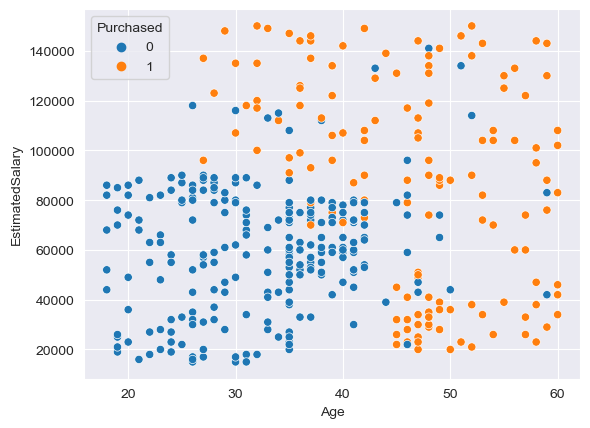

In [10]:
# Visualisation des colonnes Age et EstimatedSalary en fonction de Purchased
sns.scatterplot(x="Age", y="EstimatedSalary", data=datas, hue="Purchased")

In [11]:
# Standardisation
from sklearn.preprocessing import MinMaxScaler
mn =  MinMaxScaler()
X_train = mn.fit_transform(X_train)
X_test = mn.transform(X_test)

In [14]:
import xgboost as xgb

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [37]:
param = {"eta": 0.3, "max_depth": 8, "objective": "multi:softprob", "num_class":2}

In [38]:
steps = 20
model = xgb.train(param, D_train, steps)

In [39]:
y_pred_test = model.predict(D_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pred_train = model.predict(D_train)
best_pred_train = np.asarray([np.argmax(line) for line in pred_train])
cm = confusion_matrix(y_train, best_pred_train)
accuracy_score(y_train, best_pred_train)

0.984375

<AxesSubplot:>

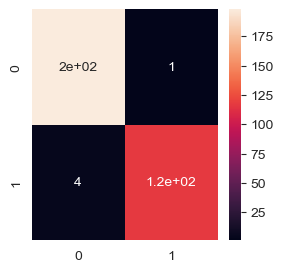

In [41]:
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True)

In [42]:
print(classification_report(y_train, best_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       199
           1       0.99      0.97      0.98       121

    accuracy                           0.98       320
   macro avg       0.99      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



In [43]:
print(classification_report(y_test, y_pred_test))

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets